Installing the required packages


In [1]:
!python --version




Python 3.9.0


In [2]:
import tensorflow as tf 
import os
#test

In [3]:
os.path.join('images',"birds")

'images\\birds'

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
gpu = tf.config.experimental.list_physical_devices("GPU")

In [6]:
print(gpu)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
import tensorflow as tf 
print(tf.__version__)

print('1: ', tf.config.list_physical_devices('GPU'))
print('2: ', tf.test.is_built_with_cuda)
print('3: ', tf.test.gpu_device_name())
print('4: ', tf.config.get_visible_devices())

2.10.0
1:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2:  <function is_built_with_cuda at 0x00000226CE062E50>
3:  /device:GPU:0
4:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2. Remove unsupported images and image formats

In [8]:
import cv2
import imghdr

In [9]:
train_dir = os.path.join("images","train")
image_exts = ["jpg","jpeg","png"]

In [10]:


# for image_dir in os.listdir(train_dir):
#     for image in os.listdir(os.path.join(train_dir, image_dir)):
#         image_path = os.path.join(train_dir, image_dir,image)
#         try:
#             img = cv2.imread(image_path)
#             ext = imghdr.what(image_path)
#             if ext not in image_exts:
#                 print('Image is not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e:
#             print("Issue with image {}".format(image_path))

            


3. Load Data

In [11]:
import numpy as np 
from matplotlib import pyplot as plt 

In [12]:
#moved images folder to another location so hardcoded
temp_dir=os.path.join("C:\\","git","images","train")
print(temp_dir)
data = tf.keras.utils.image_dataset_from_directory(temp_dir, batch_size=32)
len(data)

C:\git\images\train
Found 84635 files belonging to 525 classes.


2645

In [13]:
#default batch size is 32 
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

In [15]:
batch[0]
batch[1]

array([  0, 249, 280, 213, 391, 369, 235, 240, 280, 106, 213, 522,   5,
       329, 517, 163, 299,   0, 137, 164, 413, 300, 105, 301, 489, 101,
        37, 297, 320, 494, 506, 327])

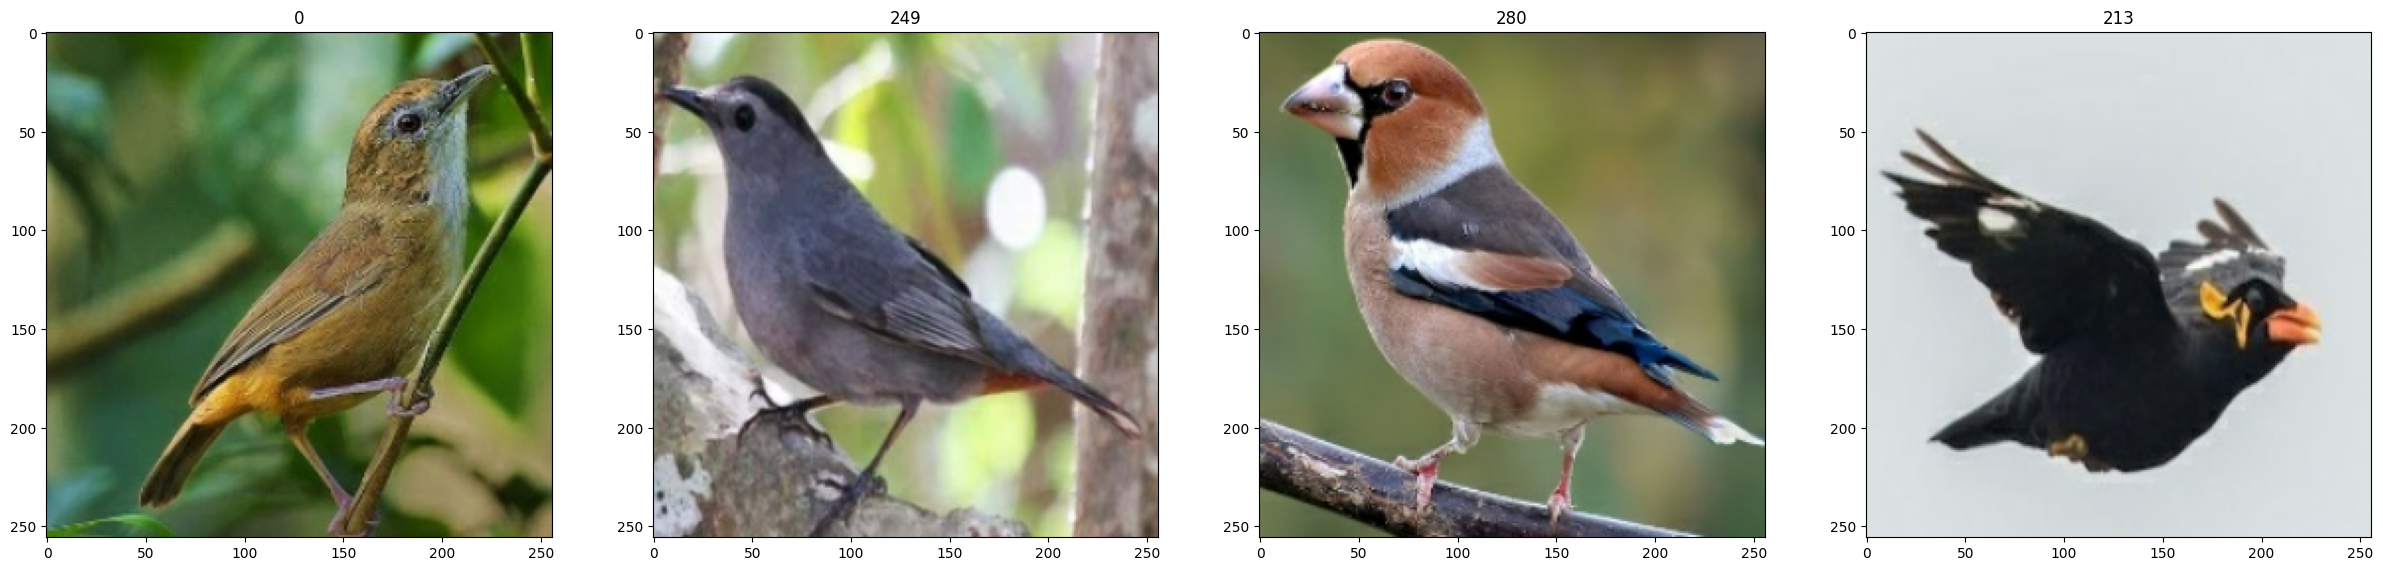

In [16]:
# batch[0].shape - see the shape of the data loaded in batches
fig , ax = plt.subplots(ncols=4, figsize=(30,30))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

4. Scale Data


In [17]:
data = data.map(lambda x,y :( (x/255), y))

In [18]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

# batch.max() - 1.0 
# batch.min() - 0.0

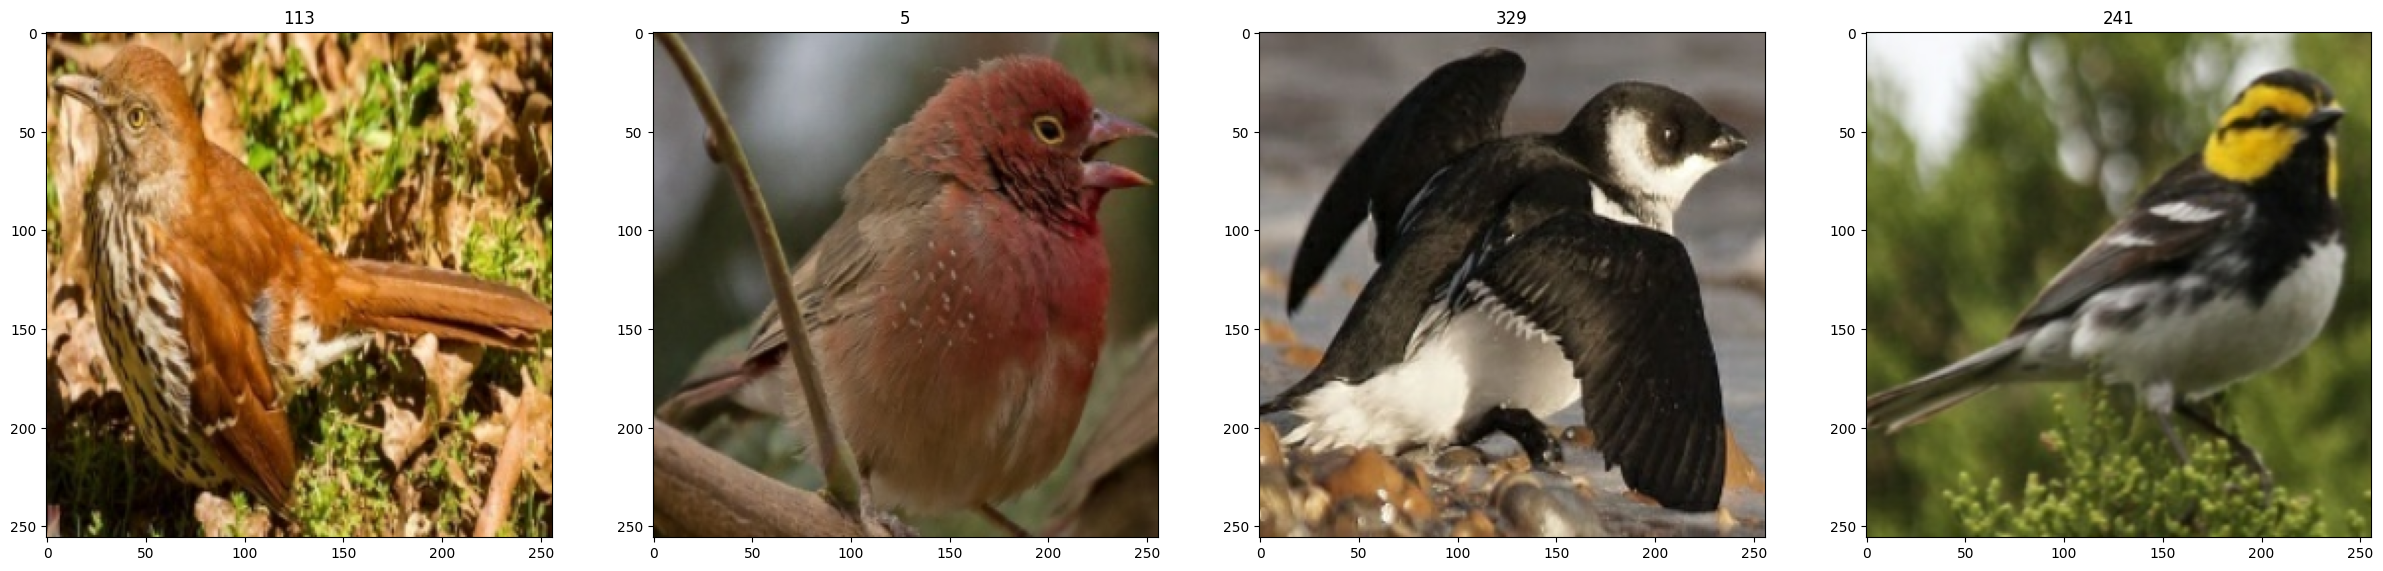

In [19]:
fig , ax = plt.subplots(ncols=4, figsize=(30,30))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

<h1>5.Split Data</h1>


In [20]:
len(data)


2645

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [22]:
train_size

1851

In [23]:
train_size+val_size+test_size

2644

In [24]:
# Using the take and skip method to load the data based on the sizes we have described

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.take(train_size+val_size).take(test_size)


<h1>6. Build Deep Leaning Model</h1>

In [25]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

In [32]:
model = Sequential()

In [33]:
# Adds a convolutional layer which will have 16 layes and a size of 3 by 3 and an activation function of rectified linear unit and an input size of 256,256 by 3 channels BGR because of the data set method
model.add(Conv2D(16 ,(4,4) , 1, activation = 'relu', input_shape = (256, 256, 3)))
#max pooling 3d condenses the image data by height and width by half
model.add(MaxPooling2D())

model.add(Conv2D(32, (4,4) , 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (4,4) , 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256 , activation = "relu"))
model.add(Dense(1, activation="sigmoid"))


In [34]:
# tf.optimizers. - check the type of optimizers using the command in tensoflow
# tf.losses. - check the type of losses that can be used to evaluate the model.

model.compile('adam' ,loss = tf.losses.BinaryCrossentropy() ,metrics=['accuracy'])

In [35]:
# Used to see how the model transfors the data
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 253, 253, 16)      784       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 123, 123, 32)      8224      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 58, 58, 16)        8208      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 29, 29, 16)      